In [1]:
#Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#Creating dataframe

df = pd.read_csv("AnalysisSet.csv")

In [4]:
#Checking if shape is correct

print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 75
Total number of columns in dataset = 6


In [5]:
#Removing pitcher's name since i don't use this variable

nums = df.loc[:, df.columns != "Pitcher"]

In [6]:
nums

,AU06,AU07,AU12,PROBINV,Ranking
0,0.339815,0.209127,0.295099,50,2
1,0.212792,0.054508,0.136546,40,4
2,0.095570,-0.067688,0.104914,15,7
3,0.073363,-0.015418,0.183364,70,1
4,0.099521,0.023965,0.125652,30,5
...,...,...,...,...,...
70,0.390940,0.116926,0.382878,40,3
71,0.160149,0.297750,0.253820,80,1
72,0.277881,0.352732,0.468006,10,5
73,0.162174,0.100680,0.484292,80,2


In [7]:
from sklearn import preprocessing

In [8]:
#Prepraring the variables for the Regression Analysis

target_col = "PROBINV"
X = nums.loc[:, nums.columns != target_col]
X = X.loc[:, X.columns != "Ranking" ]

y = nums.loc[:, target_col]

In [9]:
#This will be used after the regression to measure Spearman's Rank Correlation

y2 = nums.loc[:, nums.columns == "Ranking"]

In [10]:
#Adding a constant and creating the model

X=sm.add_constant(X)
model = sm.OLS(y, X)

In [11]:
results = model.fit()
results.params

const    36.163023
AU06    -35.248898
AU07    -27.927430
AU12     25.045802
dtype: float64

In [12]:
#Regression Results

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                PROBINV   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8913
Date:                Sun, 17 May 2020   Prob (F-statistic):              0.450
Time:                        20:41:13   Log-Likelihood:                -344.72
No. Observations:                  75   AIC:                             697.4
Df Residuals:                      71   BIC:                             706.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.1630      5.613      6.443      0.0

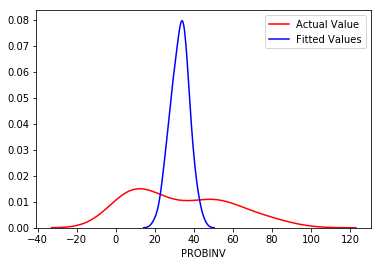

In [13]:
#Taking a look at the predictions vs the actual values

y_pred = results.predict(X)
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [14]:
#Checking for outliers using Cook's Distance

from statsmodels.formula.api import ols
infl = results.get_influence()
sm_fr = infl.summary_frame()

N = len(y)
Non_outliers = 0
for i in sm_fr["cooks_d"]:
    if i > 1:
        print("Outlier:",i)
    elif i > 0.5 and i < 1:
        print("Maybe an outlier:",i)
    else:
        Non_outliers += 1        
print("In total, there are", N - Non_outliers, "outliers.")

In total, there are 0 outliers.


In [15]:
#Checking for Multicollinearity

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,const,AU06,AU07,AU12
vif,3.888526,1.867062,1.163715,1.90824


In [16]:
y_pred = results.predict(X)
residuals = y - y_pred

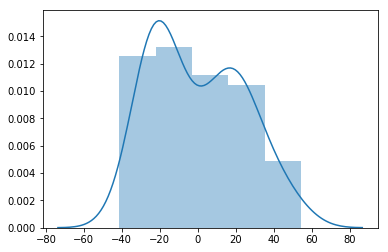

In [17]:
#Checking for normality of residuals

sns.distplot(residuals)

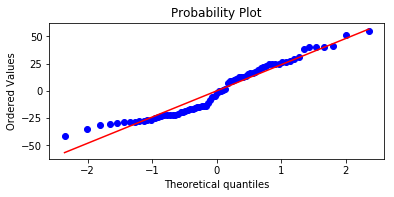

In [18]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax, fit=True)

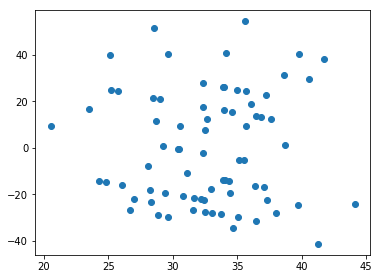

In [19]:
#Checking for heteroscedasticity

fig, ax = plt.subplots(figsize=(6,4.5))
_ = ax.scatter(y_pred, residuals)

In [20]:
#Checking for indepedent residuals

durbin_watson(residuals)

2.0022775751855795

In [21]:
X1 = X.loc[:, "AU06"]
X2 = X.loc[:, "AU07"]
X3 = X.loc[:, "AU12"]

In [22]:
#Spearman Rank to look at the relationship between the IV's and ranking individually
print(sp.stats.spearmanr(y2, X1))
print(sp.stats.spearmanr(y2, X2))
print(sp.stats.spearmanr(y2, X3))

SpearmanrResult(correlation=0.08123392466855331, pvalue=0.4884120438310485)
SpearmanrResult(correlation=0.09418300936598477, pvalue=0.4215482880755268)
SpearmanrResult(correlation=-0.09508944529480495, pvalue=0.41707373210364507)
